In [1]:
import os
os.environ["KERAS_BACKEND"] = "torch"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sbibm

INFO:bayesflow:Using backend 'torch'
When using torch backend, we need to disable autograd by default to avoid excessive memory usage. Use

with torch.enable_grad():
    ...

in contexts where you need gradients (e.g. custom training loops).
/Users/jonas.arruda/PyCharm Projects/diffusion-experiments/.venv_sbi/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0: Lotka-Volterra, dim_parameters=4, dim_data=20
(10000, 4) -5.1194263 1.7908202


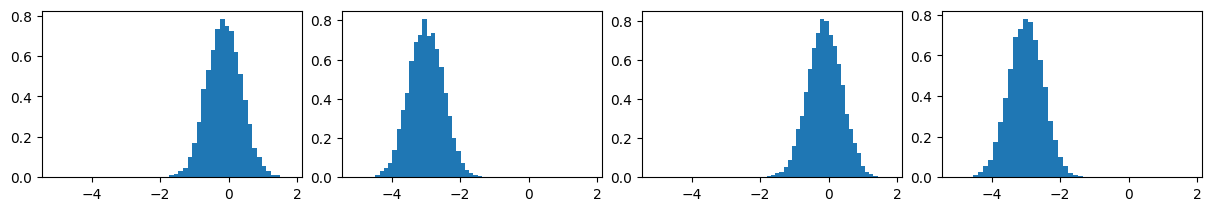

1: Gaussian Mixture, dim_parameters=2, dim_data=2
(10000, 2) -9.334026 10.639056


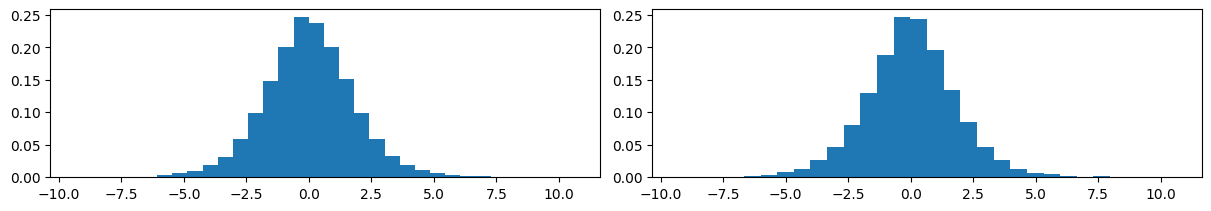

2: Gaussian Linear Uniform, dim_parameters=10, dim_data=10
(10000, 10) -11.070997 13.591009


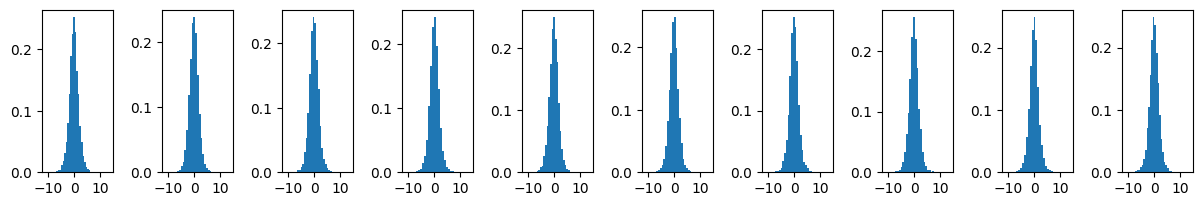

3: Two Moons, dim_parameters=2, dim_data=2
(10000, 2) -10.902174 10.724713


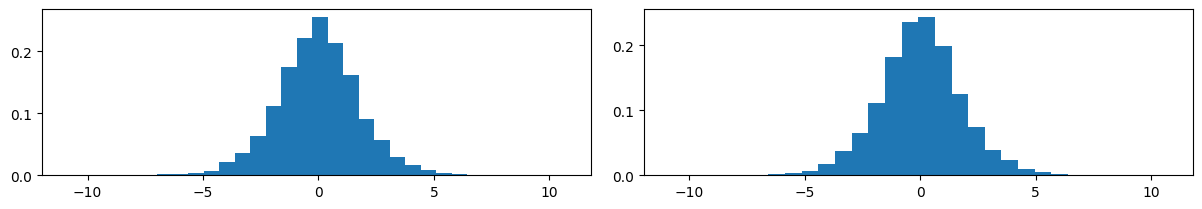

4: Bernoulli GLM, dim_parameters=10, dim_data=10
(10000, 10) -7.178357 7.5482264


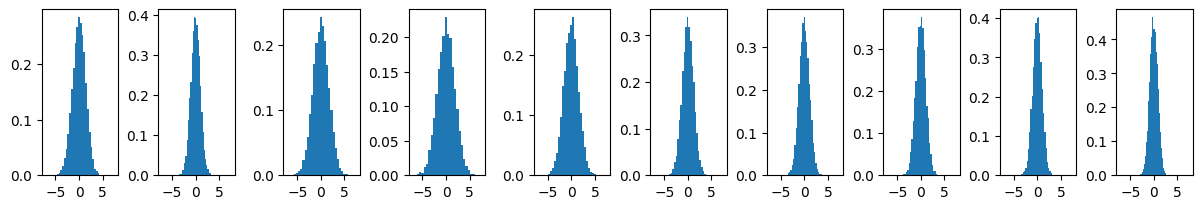

5: SIR, dim_parameters=2, dim_data=10
(10000, 2) -2.9744127 0.8943123


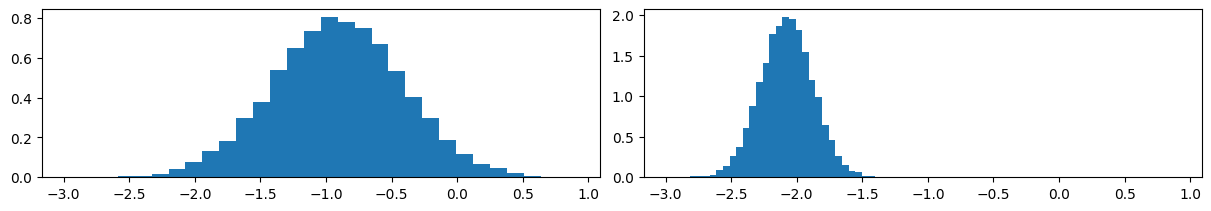

6: Gaussian Linear, dim_parameters=10, dim_data=10
(10000, 10) -1.3390359 1.4020172


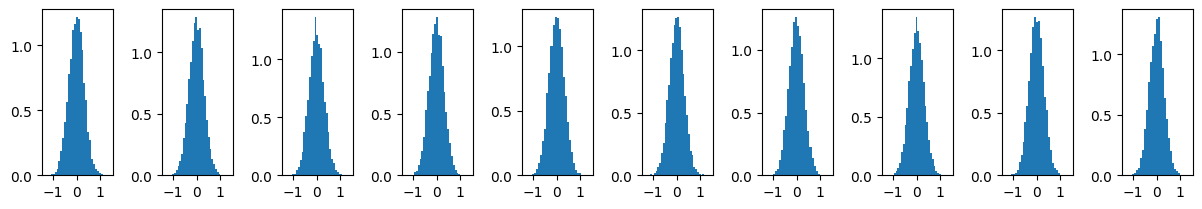

7: SLCP, dim_parameters=5, dim_data=8
(10000, 5) -10.865111 10.506454


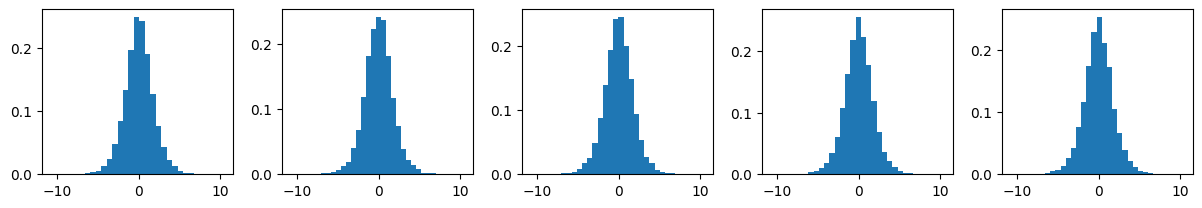

8: SLCP Distractors, dim_parameters=5, dim_data=100
(10000, 5) -10.510093 10.225321


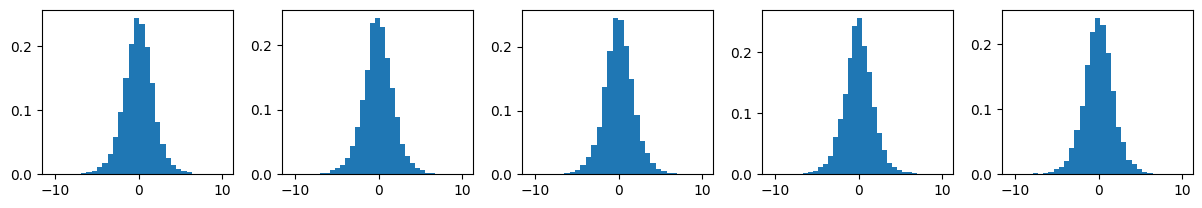

9: Bernoulli GLM Raw, dim_parameters=10, dim_data=100
(10000, 10) -7.3243666 7.376207


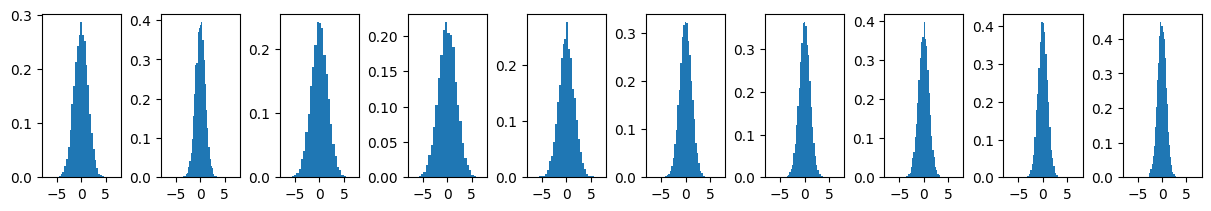

In [5]:
def create_model_config():
    colors = {
        # Flow Matching family
        "flow_matching": "#1B9E77",
        "ot_flow_matching": "#33A02C",
        "flow_matching_edm": "#66C2A5",

        # EDM family
        "diffusion_edm_vp": "#E7298A",
        "diffusion_edm_vp_ema": "#AD1457",
        "diffusion_edm_ve": "#FB9A99",

        # Cosine family
        "diffusion_cosine_F": "#7570B3",
        "diffusion_cosine_v": "#9E9AC8",
        "diffusion_cosine_noise": "#54278F",

        # Consistency family
        "consistency_model": "#D95F02",
        "stable_consistency_model": "#E6AB02",
    }
    return {"visualization": {"colors": colors}}

def model_name(k):
    names = {
        "flow_matching":r"Flow Matching$\,$",
        "ot_flow_matching":r"Flow Matching (OT)$\,$",
        "flow_matching_edm":r"Flow Matching ($\rho = -0.6$)$\,$",
        "consistency_model":r"Discrete Consistency Model$\,$",
        "stable_consistency_model":r"Continuous Consistency Model$\,$",
        "diffusion_edm_vp":r"VP EDM$\,$",
        "diffusion_edm_ve":r"VE EDM$\,$",
        "diffusion_edm_vp_ema":r"VP EDM EMA$\,$",
        "diffusion_cosine_F":r"Cosine $\boldsymbol{F}$-pred.$\,$",
        "diffusion_cosine_v":r"Cosine $\boldsymbol{v}$-pred.$\,$",
        "diffusion_cosine_noise":r"Cosine $\boldsymbol{\epsilon}$-pred.$\,$",
        "MCMC":"MCMC",
    }
    return names.get(k, k.replace("_"," ").title())

# import bayesflow as bf
# from model_settings_benchmark import create_adapter, ADAPTER_SETTINGS
# for i in range(10):
#     task = sbibm.get_task(sbibm.get_available_tasks()[i])
#     print(f"{i}: {task.name_display}, dim_parameters={task.dim_parameters}, dim_data={task.dim_data}")
#
#     # plot prior
#     if task.name == 'lotka_volterra':
#         # sbibm requires julia for this task
#         simulator = bf.simulators.LotkaVolterra(subsample='original')
#
#     elif task.name == 'sir':
#         # sbibm requires julia for this task
#         simulator = bf.simulators.SIR(subsample='original')
#     else:
#         prior = task.get_prior()
#         sbibm_simulator = task.get_simulator()
#
#         def sbibm_simulator_bf():
#             thetas = prior(num_samples=1)
#             #xs = sbibm_simulator(thetas)
#             thetas = thetas.numpy()[0]
#             return dict(parameters=thetas) #, observables=xs.numpy()[0])
#         simulator = bf.make_simulator(sbibm_simulator_bf)
#
#     prior_samples = simulator.sample((10000,))
#     adapter = create_adapter(ADAPTER_SETTINGS[task.name])
#     prior_samples = adapter.forward(prior_samples, strict=False)['inference_variables']
#     #prior_samples = prior_samples['parameters']
#     print(prior_samples.shape, np.min(prior_samples), np.max(prior_samples))
#     fig, ax = plt.subplots(1, task.dim_parameters, figsize=(12, 2), layout='constrained', sharex=True)
#     for p in range(task.dim_parameters):
#         ax[p].hist(prior_samples[:, p], bins=30, density=True)
#     plt.show()

    # if task.name in ['sir', 'lotka_volterra']:
    #     # plot prior
    #     import bayesflow as bf
    #     if task.name == 'sir':
    #         simulator_bf = bf.simulators.SIR(subsample='original')
    #     elif task.name == 'lotka_volterra':
    #         simulator_bf = bf.simulators.LotkaVolterra(subsample='original')
    #     else:
    #         raise ValueError(f"Unknown task name: {task.name}")
    #     sample_dict = simulator_bf.sample((10000,))
    #     prior_samples = sample_dict['parameters']
    #     print(sample_dict['observables'].shape)
    #     #prior_samples = task.get_prior()(1000).numpy()
    #     adapter = create_adapter(ADAPTER_SETTINGS[task.name])
    #     prior_samples = adapter.forward(dict(inference_variables=prior_samples))['inference_variables']
    #     fig, ax = plt.subplots(1, task.dim_parameters, figsize=(12, 2), layout='constrained', sharex=True)
    #     for p in range(task.dim_parameters):
    #         ax[p].hist(prior_samples[:, p], bins=30, density=True)
    #     plt.show()

In [ ]:
# Load the dataset
results = pd.read_csv('c2st_benchmark_results.csv')
results.head()

In [ ]:
ONLY_SHOW_ODE = False
FILTER_BEST_SAMPLER = True

In [ ]:
# Melt the dataframe into long form
value_vars = [col for col in results.columns if not col.endswith('_std') and col not in ['Model-Sampler', 'sampler', 'model']]
std_vars = [col for col in results.columns if col.endswith('_std')]
long_df = results.melt(id_vars=['Model-Sampler'], value_vars=value_vars, var_name='problem', value_name='cs2t')

# Merge corresponding std values
std_long = results.melt(id_vars=['Model-Sampler'], value_vars=std_vars, var_name='problem_std', value_name='std')
std_long['problem'] = std_long['problem_std'].str.replace('_std', '', regex=False)
long_df['std'] = std_long['std']

# Rank models within each problem (lower error = better rank)
long_df['error'] = np.abs(long_df['cs2t'] - 0.5)
long_df['rank'] = long_df.groupby('problem')['error'].rank(method='min', ascending=True)

# Extract model and sampler identifiers
long_df['model'] = long_df['Model-Sampler'].apply(lambda x: x.split('-')[0])
long_df['sampler'] = long_df['Model-Sampler'].apply(lambda x: x.split('-')[1])

if FILTER_BEST_SAMPLER:
    # Find the best sampler (lowest mean rank) per model
    mean_ranks = long_df.groupby(['model', 'sampler'])['rank'].mean().reset_index()
    best_samplers = mean_ranks.loc[mean_ranks.groupby('model')['rank'].idxmin(), ['model', 'sampler']]
    long_df = long_df.merge(best_samplers, on=['model', 'sampler'])
    ONLY_SHOW_ODE = False

# Retrieve colors
config = create_model_config()
colors = config["visualization"]["colors"]

problem_names = np.array([sbibm.get_task(long_df.problem.unique()[i]).name_display for i in range(10)])
problem_dim = [sbibm.get_task(long_df.problem.unique()[i]).dim_parameters for i in range(10)]
data_dim = [sbibm.get_task(long_df.problem.unique()[i]).dim_data for i in range(10)]
problem_names = np.array([
    f'{n}\n'+r'$\text{dim}(\boldsymbol{\theta})$'+f'$={p_dim}$'+r', $\text{dim}(\boldsymbol{y})$'+f'$={d_dim}$'
    for n, p_dim, d_dim in zip(problem_names, problem_dim, data_dim)])
problem_order = np.lexsort((data_dim, problem_dim))

In [ ]:
# Plot
fig = plt.figure(figsize=(10, 5), layout='constrained')
for model in long_df['Model-Sampler'].unique():
    subset = long_df[long_df['Model-Sampler'] == model]
    base_name = subset['model'].values[0]
    sampler = subset['sampler'].values[0]
    if sampler == 'sde'  and ONLY_SHOW_ODE:
        continue
    color = colors.get(base_name, 'gray')
    plt.errorbar(subset['problem'].values[problem_order],
                 np.abs(0.5-subset['cs2t'].values[problem_order]),
                 yerr=subset['std'].values[problem_order],
                 label=model_name(base_name) if sampler == 'ode' else model_name(base_name) + ' (SDE)',
                 linestyle='-' if sampler == 'ode' else '--',
                 markersize=3, capsize=3, color=color, marker='o')

plt.xticks(rotation=45, ha='right', labels=problem_names[problem_order], ticks=np.arange(len(problem_names)), fontsize=11)
plt.ylabel(r'$\vert 0.5-\text{C2ST}\vert$', fontsize=11)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), ncol=1, fancybox=False, fontsize=11)
#plt.gca().invert_yaxis()
ax = fig.get_axes()
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
fig.savefig(f'c2st_benchmark{"_best" if FILTER_BEST_SAMPLER else "_all"}.pdf', bbox_inches='tight')
plt.show()

In [ ]:
results_lueckmann = pd.read_csv('lueckmann_results.csv')
results_lueckmann = results_lueckmann[results_lueckmann['num_simulations'] == max(results_lueckmann['num_simulations'])]
results_lueckmann = results_lueckmann[results_lueckmann['algorithm'] == 'NPE']
results_lueckmann = results_lueckmann.groupby('task')['C2ST'].agg(['mean']).reset_index()

In [ ]:
# Boxplot showing distribution of model performances per problem
fig, axes = plt.subplots(2, 5, figsize=(12, 4), sharex=True, sharey=True, layout='constrained')
axes = axes.flatten()

for idx, problem_idx in enumerate(problem_order):
    problem = long_df['problem'].unique()[problem_idx]
    subset = long_df[long_df['problem'] == problem]

    # Filter by sampler if needed
    if ONLY_SHOW_ODE:
        subset = subset[subset['sampler'] == 'ode']

    # Prepare data for boxplot
    data_to_plot = []
    std_to_plot = []
    labels = []
    colors_list = []

    for model in subset['Model-Sampler'].unique():
        model_data = subset[subset['Model-Sampler'] == model]
        base_name = model_data['model'].values[0]
        sampler = model_data['sampler'].values[0]

        # Create error values
        error = np.abs(0.5 - model_data['cs2t'].values[0])
        #error = model_data['cs2t'].values[0]

        data_to_plot.append(error)
        std_to_plot.append(model_data['std'].values[0])
        label = model_name(base_name)
        if sampler == 'sde':
            label += ' (SDE)'
        labels.append(label)
        colors_list.append(colors.get(base_name, 'gray'))

    # Plot individual points with colors
    x_positions = np.arange(len(data_to_plot))
    for i, color in enumerate(colors_list):
        axes[idx].errorbar(x_positions[i], data_to_plot[i], yerr=std_to_plot[i],
                          fmt='o', markersize=6, capsize=3,
                          color=color, markeredgewidth=0.5, label=labels[i])

    #axes[idx].axhline(y=0, color='black', linestyle='--', linewidth=1)
    axes[idx].set_title(problem_names[problem_idx], fontsize=11)
    axes[idx].spines['right'].set_visible(False)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].grid(True)
    axes[idx].set_ylim(0, 0.55)
    #axes[idx].set_yticks([0.1, 0.2, 0.3, 0.4, 0.5])
    axes[idx].set_xticks([])

    ref_val = results_lueckmann.loc[results_lueckmann['task'] == problem, 'mean'].item()
    axes[idx].axhline(y=np.abs(0.5 - ref_val), color='black', linestyle='--', linewidth=1, label='Lueckmann et. al. NPE',
                      zorder=-1)

#axes[0].set_ylabel(r'$\vert 0.5-\text{C2ST}\vert$', fontsize=11)
axes[0].set_ylabel(r'$\vert 0.5-\text{C2ST}\vert$', fontsize=11)
axes[5].set_ylabel(r'$\vert 0.5-\text{C2ST}\vert$', fontsize=11)
handles = fig.axes[0].get_legend_handles_labels()[0]
fig.legend(labels=labels+['Lueckmann et. al. NPE'], handles=handles[1:]+handles[:1],
           loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=5, fancybox=False, fontsize=11)
fig.savefig(f'c2st_benchmark_boxplot{"_best" if FILTER_BEST_SAMPLER else "_all"}.pdf', bbox_inches='tight')
plt.show()

In [ ]:
# Plot
fig = plt.figure(figsize=(10, 5), layout='constrained')
for model in long_df['Model-Sampler'].unique():
    subset = long_df[long_df['Model-Sampler'] == model]
    base_name = subset['model'].values[0]
    sampler = subset['sampler'].values[0]
    if sampler == 'sde' and ONLY_SHOW_ODE:
        continue
    color = colors.get(base_name, 'gray')
    plt.plot(subset['problem'].values[problem_order], subset['rank'].values[problem_order],
             label=model_name(base_name) if sampler == 'ode' else model_name(base_name) + ' (SDE)',
             linestyle='-' if sampler == 'ode' else '--',
             color=color, markersize=3,
             marker='o')

plt.xticks(rotation=45, ha='right', labels=problem_names[problem_order], ticks=np.arange(len(problem_names)), fontsize=11)
plt.ylabel('Rank (lower is better)', fontsize=11)
#plt.gca().invert_yaxis()
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), ncol=1, fancybox=False, fontsize=11)
ax = fig.get_axes()
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
fig.savefig(f'c2st_benchmark_ranks{"_best" if FILTER_BEST_SAMPLER else "_all"}.pdf', bbox_inches='tight')
plt.show()